# VALORANT Masters 2021: Player & Map Data Analysis

### Context
Valorant is a free-to-play first-person competitive shooter developed and published by Riot Games. The game was released in 2020 and this [dataset](https://www.kaggle.com/datasets/jaykumar1607/valorant-masters-2021-player-map-data?resource=download) is based on their first ever major tournament, Stage 2: "Masters" of the VCT (Valorant Champtions Tour) which took place between May 24th to May 30th in Iceland

The dataset consists of four csv files: banned_map_stats, map_pick_stats, player_stats, and side_pick_stats.

Here are some examples of what the data looks like in each of the csv files with descriptions of the columns under each table:

### banned_maps_stats

| Map | Total | Day 1 | Day 2 | Day 3 | Day 4 | Day 5 | Day 6 | Day 7 | 
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| Ascent | 2 | 0 | 0 | 1 | 0 | 1 | 0 | 0 |
| Bind | 9 | 2 | 3 | 1 | 2 | 1 | 0 | 0 |

- Map: The map banned in the tournament
- Total: Total number of times map has been banned throughout the tournament
- Day 1-7: Number of times the map has been banned on each specific day

### map_pick_stats
| Map | Total | Day 1 | Day 2 | Day 3 | Day 4 | Day 5 | Day 6 | Day 7 | 
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| Ascent | 16 | 3 | 3 | 2 | 3 | 2 | 2 | 1 |
| Bind | 9 | 1 | 0 | 2 | 1 | 2 | 2 | 1 |

- Map: The map played in the tournament
- Total: Total number of times map has been played throughout the tournament
- Day 1-7: Number of times map has been played on each specific day

### player_stats
| Player | Country | Team | Agents | Maps | K | D | A | KD | KDA | ACS/Map | K/Map | D/Map | A/Map |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | 
| Tenz | Canada | Sentinels | "['Jett', 'Reyna', 'Raze']" | 9 | 206 | 139 | 55 | 1.48 | 1.87 | 289 | 22.8 | 15.4 | 6.1 |
| ScreaM | Belgium | Team Liquid | "['Sage', 'Pheonix' ]" | 9 | 177 | 131 | 56 | 1.35 | 1.77 | 265 | 19.6 | 14.5 | 6.2 | 

- Player: The player in game name (ign) that has participated in the tournament
- Country: Country of origin for each player
- Team: Team of player
- Agents: A playable character in Valorant that was chosen by the players
- Maps: Maps that the player has participated in
- K: The number of total kills throughout the tournament for each player
- D : The number of total deaths throughout the tournament for each player
- A: The number of assists (through damage or utility) throughout the tournament for each player
- KD: Kill Death Ratio
- KDA: Kill Death Assist Ratio
- ACS/Map: Average combat score for each player (The average amount of damage per round per map)
- K/Map: Average number of kills per map for each player
- D/Map: Average number of deaths per map for each player
- A/Map: Average number of assists per map for each player

### side_pick_stats
| Map | Atk Wins | Def Wins | 
| --- | --- | --- |
| Ascent | 94 | 130 | 
| Bind | 74 | 55 | 

- Map: Maps used throughout the tournament
- Atk Wins: Number of rounds won on attack side for each map
- Def Wins: Number of rounds won on defense side for each map

### Project Description
For this project, I will be analyzing and visualizing the four datasets shown above using Python with the pandas, numpy, and matplotlib library to answer the following questions not in any particular order:
- Which maps were banned the most?
- Which maps were banned the least?
- Which maps were picked the most?
- Which maps were picked the least?
- Which agents were picked the most?
- Which agents were picked the least?
- Which countries had the least/most amount of players?

and more throughout this project. 

### Importing csv files into pandas dataframe

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.image as mpimg

In [141]:
banned_map_df = pd.read_csv("D:/DataEngineering/Projects/ValorantProject/banned_maps_stats.csv", index_col="Map")
banned_map_df

,Total,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Map,,,,,,,,
Ascent,2,0,0,1,0,1,0,0
Bind,9,2,3,1,2,1,0,0
Haven,3,0,0,1,1,0,1,0
Icebox,8,1,1,0,2,2,2,0
Split,12,3,2,3,1,2,1,0


In [142]:
map_picks_df = pd.read_csv("D:\DataEngineering\Projects\ValorantProject\map_pick_stats.csv", index_col="Map")
map_picks_df

,Total,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Map,,,,,,,,
Ascent,16,3,3,2,3,2,2,1
Bind,9,1,0,2,1,2,2,1
Haven,15,3,3,2,2,3,1,1
Icebox,10,2,2,3,1,1,0,1
Split,6,0,1,0,2,1,1,1


In [143]:
player_stats_df = pd.read_csv("D:\DataEngineering\Projects\ValorantProject\player_stats.csv", index_col="Player")
player_stats_df.head()

,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
Player,,,,,,,,,,,,,
TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5


In [144]:
side_picks_df = pd.read_csv("D:\DataEngineering\Projects\ValorantProject\side_pick_stats.csv", index_col="Map")
side_picks_df

,Atk Wins,Def Wins
Map,,
Ascent,96,130
Bind,74,55
Haven,130,105
Icebox,99,88
Split,44,53


### Renaming columns for readability

In [145]:
banned_map_df.rename(columns = {'Total': 'Total_banned'}, inplace = True)
banned_map_df

,Total_banned,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Map,,,,,,,,
Ascent,2,0,0,1,0,1,0,0
Bind,9,2,3,1,2,1,0,0
Haven,3,0,0,1,1,0,1,0
Icebox,8,1,1,0,2,2,2,0
Split,12,3,2,3,1,2,1,0


In [146]:
map_picks_df.rename(columns = {'Total': 'Total_picked'}, inplace = True)
map_picks_df

,Total_picked,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Map,,,,,,,,
Ascent,16,3,3,2,3,2,2,1
Bind,9,1,0,2,1,2,2,1
Haven,15,3,3,2,2,3,1,1
Icebox,10,2,2,3,1,1,0,1
Split,6,0,1,0,2,1,1,1


### Cleaning up data and removing unnecessary columns

In [147]:
banned_map_df = banned_map_df.drop(['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'], axis=1)
banned_map_df

,Total_banned
Map,
Ascent,2
Bind,9
Haven,3
Icebox,8
Split,12


In [148]:
map_picks_df = map_picks_df.drop(['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'], axis=1)
map_picks_df

,Total_picked
Map,
Ascent,16
Bind,9
Haven,15
Icebox,10
Split,6


In [149]:
# merging banned maps and merged maps dataframe into one
map_df = banned_map_df.merge(map_picks_df, how='inner', on='Map')
map_df

,Total_banned,Total_picked
Map,,
Ascent,2,16
Bind,9,9
Haven,3,15
Icebox,8,10
Split,12,6


In [150]:
# merging map_df with side_picks_df to get all map data into one dataframe
map_stats_df = map_df.merge(side_picks_df, how='inner', on='Map')
map_stats_df

,Total_banned,Total_picked,Atk Wins,Def Wins
Map,,,,
Ascent,2,16,96,130
Bind,9,9,74,55
Haven,3,15,130,105
Icebox,8,10,99,88
Split,12,6,44,53


Now that we have cleaned up the data, we can now start data analysis

### Most/Least banned maps

In [151]:
# dictionary to store valorant map as key and number of bans as value
banned_map_dict = {}
for row in map_stats_df.itertuples():
    val_map = row[0]
    banned = row[1]
    banned_map_dict[val_map] = banned
    
banned_map_dict

{'Ascent': 2, 'Bind': 9, 'Haven': 3, 'Icebox': 8, 'Split': 12}

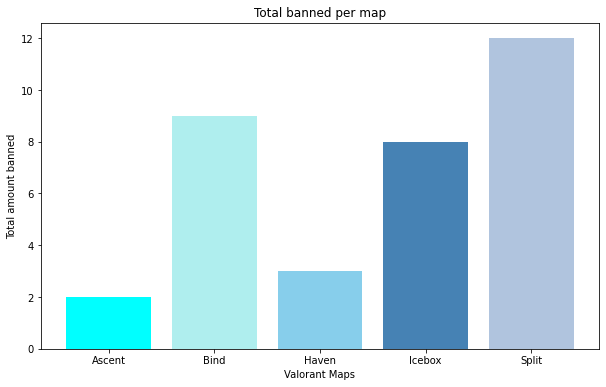

In [152]:
# plotting a bar graph with x-axis as map and y-axis as number of bans
val_map_x = list(banned_map_dict.keys())
num_bans_y = list(banned_map_dict.values())


plt.figure(figsize=(10,6))               # increasing bar graph size 
plt.bar(val_map_x, num_bans_y, color=["cyan", "paleturquoise", "skyblue", "steelblue", "lightsteelblue"]) # creating color palette for bar graph
plt.title("Total banned per map")
plt.xlabel("Valorant Maps")
plt.ylabel("Total amount banned")
plt.show()


From this chart, we can see that Split had the highest number of bans with 12 bans, and Ascent had the lowest number of bans of two bans. 

The reason for Split having the highest number of bans at the time was due to its heavy CT-sidedness, meaning it was a lot harder to comeback from having a weak CT-side. 

### Most/Least Picked Maps

In [153]:
# dictionary to store valorant maps as key and number of picks as value
picked_map_dict = {}
for row in map_stats_df.itertuples():
    val_map = row[0]
    num_picked = row[2]
    picked_map_dict[val_map] = num_picked
    
picked_map_dict

{'Ascent': 16, 'Bind': 9, 'Haven': 15, 'Icebox': 10, 'Split': 6}

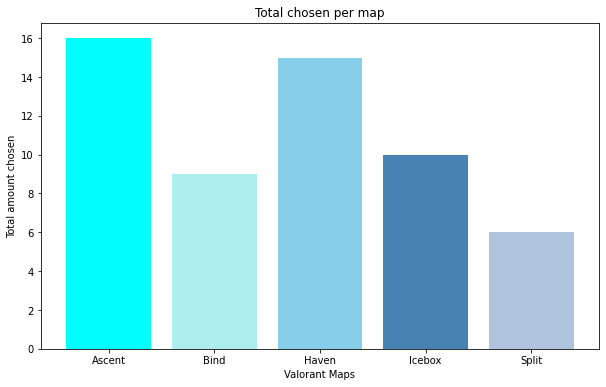

In [154]:
picked_map_x = list(picked_map_dict.keys())
num_picked_y = list(picked_map_dict.values())

plt.figure(figsize=(10,6))              
plt.bar(picked_map_x, num_picked_y, color=["cyan", "paleturquoise", "skyblue", "steelblue", "lightsteelblue"]) # creating color palette for bar graph
plt.title("Total chosen per map")
plt.xlabel("Valorant Maps")
plt.ylabel("Total amount chosen")
plt.show()

From the graph above, we can see that Ascent was picked the most, and Split was picked the least.

This is most likely due to Ascent having the lowest number of bans and Split having the highest number of bans.

### Most/Least Picked Agents

In [155]:
# Creating agent DataFrame from player_stats_df
agents_df = player_stats_df.loc[:, "Agents"]
agent_list  = []           # list to hold agents
agents_dict = {}           # dictionary to hold agent name as key and number of occurences as value
for agent_lst in agents_df:
    agent_lst = agent_lst.strip("[]")
    agents = agent_lst.split()
    agent_list.append(agents)
    
for lst in agent_list:
    for agent in lst:
        agent = agent.strip(",") # to get rid of keys with commas 
        agent = (eval(agent))    # to get rid of quotation marks 
        if agent in agents_dict:
            agents_dict[agent] += 1
        else:
            agents_dict[agent] = 1
            

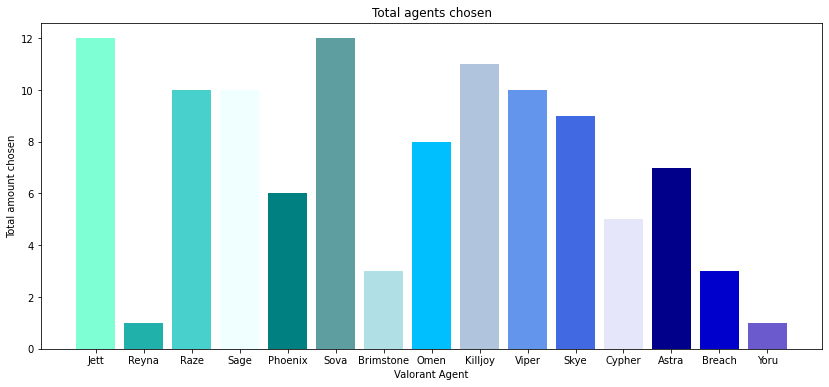

In [156]:
agents_x = list(agents_dict.keys())
picked_y = list(agents_dict.values())
colors = ["aquamarine", "lightseagreen", "mediumturquoise", "azure", "teal", "cadetblue", "powderblue", "deepskyblue",
          "lightsteelblue", "cornflowerblue", "royalblue", "lavender", "darkblue", "mediumblue", "slateblue"]


plt.figure(figsize=(14,6))              
plt.bar(agents_x, picked_y, color=colors)
plt.title("Total agents chosen")
plt.xlabel("Valorant Agent")
plt.ylabel("Total amount chosen")
plt.show()

From the graph above, we can see that the agents with the lowest pick rates were Yoru and Reyna, each being chosen only once throughout the tournament. The agents with the highest pick rates were Sova and Jett with being chosen 12 times.

Yoru and Reyna were the weakest agents at the time as Reyna's utility does not contribute much to the team and is too dependent on getting kills. Yoru was considered unviable at the time as there were other agents who filled the duelist role much better

Jett and Sova were considered to be instant picks by teams at the time as Jett's dash was one of the strongest abilities at the time. Sova was essential for getting information throughout the rounds and was considered irreplacable.

### Countries with the most/least amount of players

In [157]:
# dataframe with players and countries
country_df = player_stats_df.loc[:,"Country"]
country_df

Player
TenZ                 Canada
ScreaM              Belgium
ShahZaM       United States
L1NK         United Kingdom
Jamppi              Finland
Lakia           South Korea
SicK          United States
Mistic       United Kingdom
Klaus             Argentina
Sacy                 Brazil
Patiphan           Thailand
Derke               Finland
Effys                Canada
Magnum       Czech Republic
Zellsis       United States
Penny                Canada
Peri            South Korea
Neth                  Japan
Dapr          United States
Doma                Croatia
SScary             Thailand
Boaster      United Kingdom
Foxz               Thailand
Soulcas      United Kingdom
Gaabxx               Brazil
Mazino                Chile
Prozin               Brazil
Zepher                Japan
Suggest         South Korea
Allow           South Korea
Zombs         United States
Vanity        United States
Sutecas              Brazil
Kryptix      United Kingdom
Saadhak           Argentina
Crws         

In [158]:
country_dict = {}
for country in country_df:
    if country in country_dict:
        country_dict[country] += 1
    else:
        country_dict[country] = 1
        
country_dict

{'Canada': 3,
 'Belgium': 1,
 'United States': 7,
 'United Kingdom': 5,
 'Finland': 2,
 'South Korea': 7,
 'Argentina': 3,
 'Brazil': 9,
 'Thailand': 5,
 'Czech Republic': 1,
 'Japan': 3,
 'Croatia': 1,
 'Chile': 3}

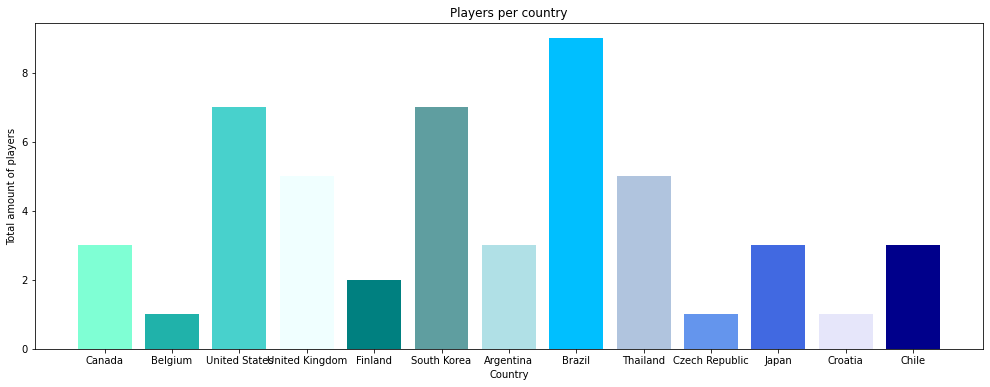

In [159]:
country_x = list(country_dict.keys())
num_country_y = list(country_dict.values())
colors = ["aquamarine", "lightseagreen", "mediumturquoise", "azure", "teal", "cadetblue", "powderblue", "deepskyblue",
          "lightsteelblue", "cornflowerblue", "royalblue", "lavender", "darkblue"]

plt.figure(figsize=(17,6))              
plt.bar(country_x, num_country_y, color=colors)
plt.title("Players per country")
plt.xlabel("Country")
plt.ylabel("Total amount of players")
plt.show()

From the graph above, we can see that Brazil had the highest number of players with nine players. Czech Republic and Belgium had the least amount of players with one player each.